In [76]:
import numpy as np
import pandas as pd

In [77]:
import pandas as pd

# List of possible encodings to try
encodings = ['utf-8', 'latin1', 'ISO-8853-1', 'cp1252']

file_path = 'spam.csv'

#Attempt to read the CSV file with different encodings
for encoding in encodings:
  try:
    df = pd.read_csv(file_path, encoding=encoding)
    print(f"File successfully read with encoding: {encoding}")
    break
  except UnicodeDecodeError:
    print(f"Failed to read with encoding: {encoding}")
    continue

if 'df' in locals():
  print("CSV file has been successfully loaded.")
else:
  print("All encoding attempts failed. Unable to read the CSV file.")


Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded.


In [78]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
212,ham,K:)k:)good:)study well.,NaN,NaN,NaN
722,ham,That is wondar full flim.,NaN,NaN,NaN
70,ham,Wah lucky man... Then can save money... Hee...,NaN,NaN,NaN
4645,spam,We tried to contact you re your reply to our o...,NaN,NaN,NaN
1742,ham,\EY! CALM DOWNON THEACUSATIONS.. ITXT U COS IW...,NaN,NaN,NaN


In [79]:
df.shape

(5572, 5)

In [80]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [82]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [83]:
df.sample(5)

,v1,v2
3613,ham,Ok c Ì_ then.
4837,ham,All boys made fun of me today. Ok i have no pr...
2587,ham,"Aight, see you in a bit"
2771,ham,Then ur sis how?
3902,ham,Waiting in e car 4 my mum lor. U leh? Reach ho...


In [84]:
# renaming the columns
df.rename(columns={'v1' : 'target', 'v2' : 'text'},inplace=True)
df.sample(5)

,target,text
5251,ham,"Yeah work is fine, started last week, all the ..."
5167,ham,Oh did you charge camera
4215,ham,Er mw im filled tuth is aight
2703,ham,Yup no more already... Thanx 4 printing n hand...
4486,ham,Miss call miss call khelate kintu opponenter m...


In [85]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

In [86]:
df['target'] = encoder.fit_transform(df['target'])

In [87]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [88]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [89]:
# Check for duplicate values
df.duplicated().sum()

403

In [90]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [91]:
df.duplicated().sum()

0

In [92]:
df.shape

(5169, 2)

# 2. EDA

In [93]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

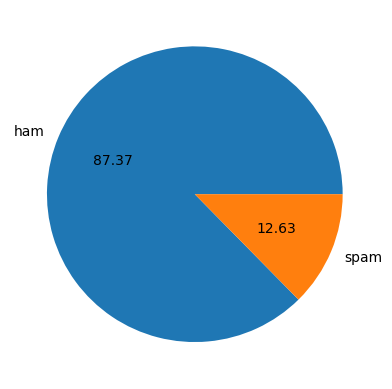

In [95]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [96]:
# Big Chunk of ham and very less spam so out data is not balanced

In [97]:
import nltk

In [98]:
!pip install nltk

In [99]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nisht\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [100]:
df['num_characters']=df['text'].apply(len)

In [101]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [102]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [103]:
df.head()

,target,text,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [104]:
df[['num_characters','num_sentences']].describe()

,num_characters,num_sentences
count,5169.000000,5169.000000
mean,78.977945,1.965564
std,58.236293,1.448541
min,2.000000,1.000000
25%,36.000000,1.000000
50%,60.000000,1.000000
75%,117.000000,2.000000
max,910.000000,38.000000


In [105]:
# tarketing ham
df[df['target']==0][['num_characters','num_sentences']].describe()

,num_characters,num_sentences
count,4516.000000,4516.000000
mean,70.459256,1.820195
std,56.358207,1.383657
min,2.000000,1.000000
25%,34.000000,1.000000
50%,52.000000,1.000000
75%,90.000000,2.000000
max,910.000000,38.000000


In [106]:
# targeting spam
df[df['target'] == 1][['num_characters','num_sentences']].describe()

,num_characters,num_sentences
count,653.000000,653.000000
mean,137.891271,2.970904
std,30.137753,1.488425
min,13.000000,1.000000
25%,132.000000,2.000000
50%,149.000000,3.000000
75%,157.000000,4.000000
max,224.000000,9.000000


In [107]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

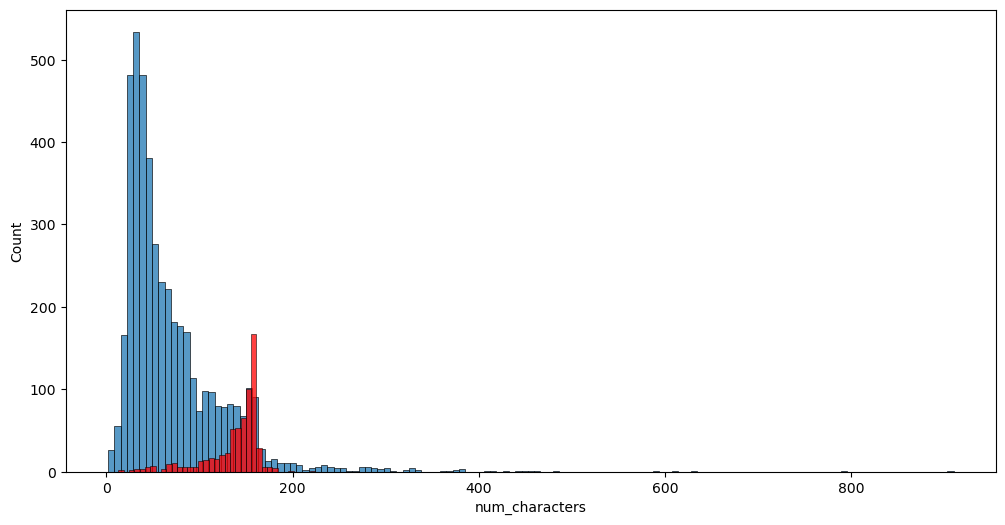

In [108]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

C:\Users\nisht\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


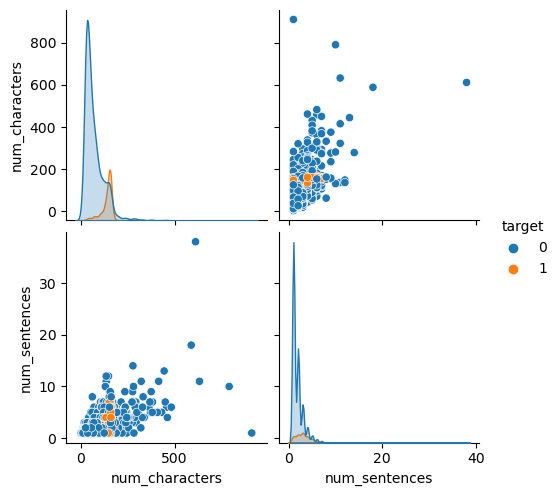

In [109]:
sns.pairplot(df,hue='target')

<Axes: >

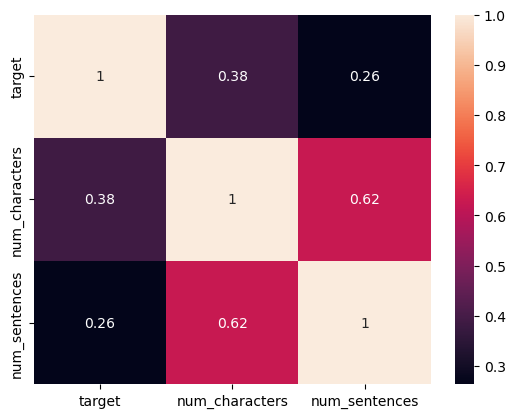

In [110]:
import pandas as pd
import seaborn as sns

# Assuming df is your DataFrame
# Drop non-numeric columns
numeric_df = df.select_dtypes(include='number')

# Create heatmap of correlations
sns.heatmap(numeric_df.corr(), annot=True)


# 3. Data Preprocessing

# --Lower Case

# --Tokenization

# --Removing special characters

# --removing stop words and punctuation

# --Stemming

In [111]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
   text = text.lower()
   text = nltk.word_tokenize(text)

   y = []
   for i in text:
    if i.isalnum():
      y.append(i)

   text = y[:]
   y.clear()

   for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

   text = y[:]
   y.clear()

   for i in text:
    y.append(ps.stem(i))

   return " ".join(y)

transformed_text = transform_text("I'm going be home soon and i don't want to talk about this stuff anymore tognight, k? I've cried enough today.")

print(transformed_text)

go home soon want talk stuff anymor tognight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisht\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [113]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('lovingg')

'lovingg'

In [114]:
df['transformed_text'] = df['text'].apply(transform_text)

In [115]:
df.head()

,target,text,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,nah think goe usf live around though


In [116]:
pip install WordCloud


Note: you may need to restart the kernel to use updated packages.


In [117]:
from wordcloud import WordCloud

# Example text data
text_data = "This is an example sentence for generating a word cloud."

# Create WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Generate the word cloud from text data
wordcloud = wc.generate(text_data)

# Now you can display the word cloud or save it to a file


In [118]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

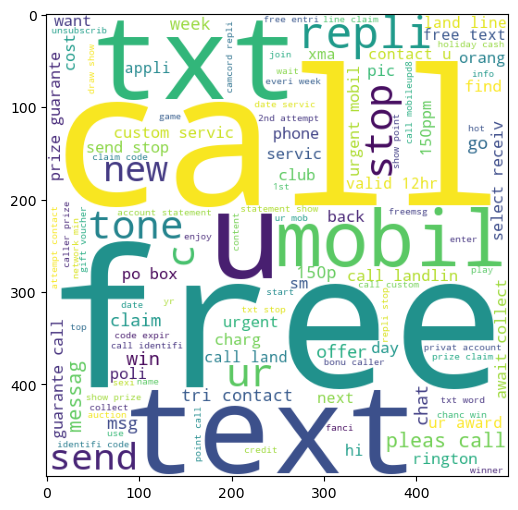

In [119]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [120]:
df.head()

,target,text,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,nah think goe usf live around though


In [121]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [122]:
     len(spam_corpus)

9939

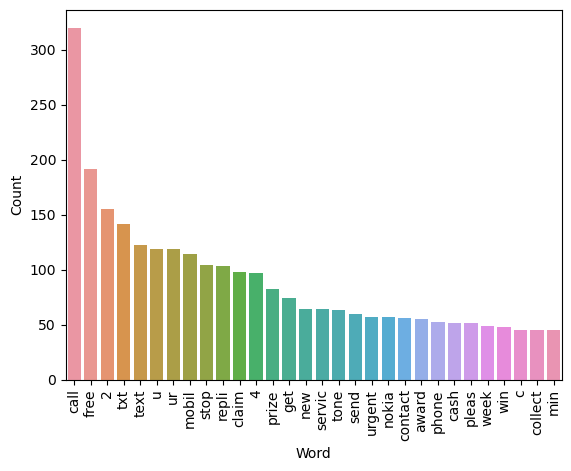

In [123]:
from collections import Counter

# Assuming spam_corpus is a list of strings containing text data

# Check if spam_corpus is not empty
if len(spam_corpus) == 0:
    print("Error: The spam corpus is empty.")
else:
    # Create a Counter object to count occurrences of each word
    word_counts = Counter(spam_corpus)

    # Extract the most common 30 words and their counts
    most_common_words = word_counts.most_common(30)

    # Convert the most common words and counts into a DataFrame
    df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

    # Plot the barplot
    sns.barplot(x='Word', y='Count', data=df_most_common)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation='vertical')

    # Show the plot
    plt.show()

In [124]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [125]:
len(ham_corpus)

35404

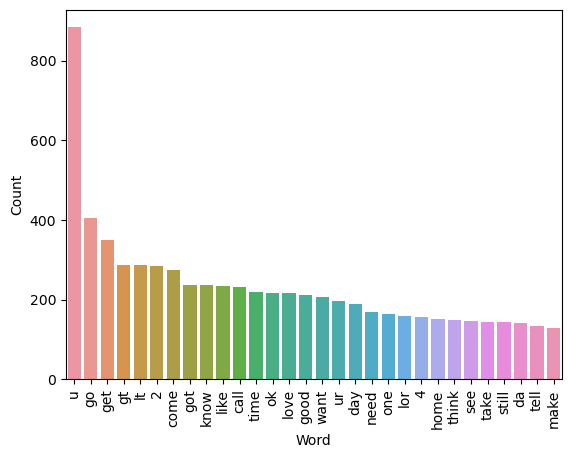

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming ham_corpus is a list of strings containing text data

# Check if ham_corpus is not empty
if len(ham_corpus) == 0:
    print("Error: The ham corpus is empty.")
else:
    # Create a Counter object to count occurrences of each word
    word_counts = Counter(ham_corpus)

    # Extract the most common 30 words and their counts
    most_common_words = word_counts.most_common(30)

    # Convert the most common words and counts into a DataFrame
    df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

    # Plot the barplot
    sns.barplot(x='Word', y='Count', data=df_most_common)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation='vertical')

    # Show the plot
    plt.show()

In [127]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,nah think goe usf live around though


# 4. Building the Model

In [128]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [129]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [130]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [131]:
# appending the num_character col to X
#  X = np.hstack((X,df['num_characters'].values.reshpae(-1,1)))

In [132]:
X.shape

(5169, 3000)

In [133]:
y = df['target'].values

In [134]:
from sklearn.model_selection import train_test_split

In [135]:


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [136]:



from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [137]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [138]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [139]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [140]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [141]:
# tfidf -->MNB

In [142]:
!pip install xgboost

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [144]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [145]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'Rf' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' :gbdt,
    'xgb' :xgb,
}

In [146]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [147]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [148]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  Rf
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [149]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [150]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,Rf,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [151]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [152]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,Rf,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


C:\Users\nisht\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


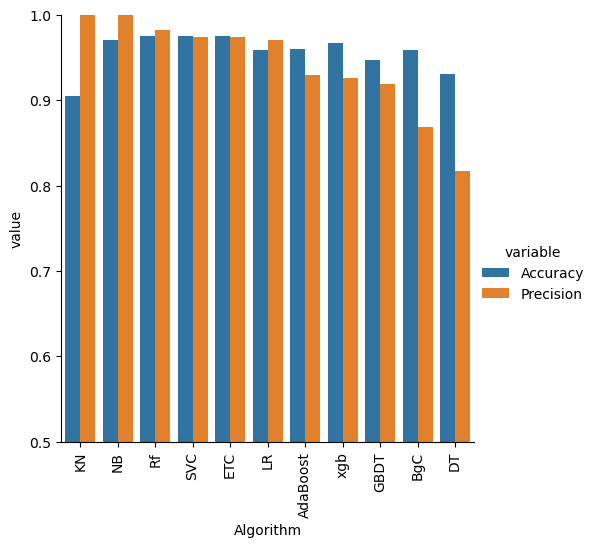

In [153]:
sns.catplot(x = 'Algorithm', y='value',
            hue = 'variable',data=performance_df1, kind='bar',height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [154]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [155]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [156]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [157]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [158]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [159]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,Rf,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [160]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [161]:
voting = VotingClassifier(estimators=[('svm', svc),('nb', mnb),('et', etc)],voting='soft)')

In [164]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')
voting.fit(X_train, y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [165]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [169]:
#Applying stacking
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [170]:
from sklearn.ensemble import StackingClassifier

In [172]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [173]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [174]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [177]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#sample text data and corresponding labels (replace with your actual data)
X_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train = [0,1,0] #Example labels (0 for negative and 1 for positive)

#create and train the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

#create and train the Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

#save the trained TF-IDF vectorizer and Naive Bayes model to files
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)
    
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)